## Aluno: Marcelo Mastrangi Bracali RM:333909

In [1]:
# Imports necessarios
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt,math
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

### usando o arquivo house_prices.csv, responda as questões abaixo

## 1) leia o arquivo, trate os valores faltantes e remova duplicatas

In [2]:
raw_df = pd.read_csv('house_prices.csv',sep=';') # Le CSV
raw_df.size

200

In [3]:
raw_df.dropna(inplace=True) # Remove em branco
raw_df.drop_duplicates(keep='first', inplace=True) # Remove duplicatas
raw_df.size

184

## 2) Há outliers no data set? Se sim, trate-os de forma adequada

In [4]:
raw_df.describe()
# Atraves do metodo describe podemos verificar que existem outliers. A distancia entre o terceiro quartil eo 

,tamanho,n_quartos,idade,preco
count,46.000000,46.000000,46.000000,46.000000
mean,2005.760870,3.173913,23.239130,342315.108696
std,802.711936,0.768963,25.620465,125731.986959
min,852.000000,1.000000,2.000000,169900.000000
25%,1429.500000,3.000000,9.250000,249900.000000
50%,1889.000000,3.000000,18.000000,306950.000000
75%,2284.500000,4.000000,31.500000,392175.000000
max,4478.000000,5.000000,170.000000,699900.000000


In [5]:
raw_df = raw_df[(np.abs(stats.zscore(raw_df)) < 3).all(axis=1)] # Remover outliers usando o Zscore
raw_df.size

176

## 3) insira uma coluna, denominada 'n_andares', com valores no intervalo [1,2], preenchidos de forma aleatória

In [6]:
raw_df['n_andares'] = np.random.choice([1, 2], raw_df.shape[0])
raw_df.head()

,tamanho,n_quartos,idade,preco,n_andares
0,2104.0,3.0,45.0,399900,1
2,1600.0,3.0,30.0,329900,2
3,2400.0,3.0,32.0,369000,1
4,1416.0,2.0,10.0,232000,2
5,3000.0,4.0,14.0,539900,2


## 4) para cada variável, plote um scatter e verifique sua relação com a variável meta (preco)

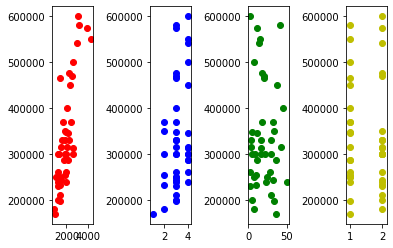

In [7]:
# Via matplotlib
fig = plt.figure()
chart1 = fig.add_subplot(1,7,1)
chart1.scatter(raw_df['tamanho'], raw_df['preco'],color='r')
chart2 = fig.add_subplot(1,7,3)
chart2.scatter(raw_df['n_quartos'], raw_df['preco'],color='b')
chart3 = fig.add_subplot(1,7,5)
chart3.scatter(raw_df['idade'], raw_df['preco'],color='g')
chart4 = fig.add_subplot(1,7,7)
chart4.scatter(raw_df['n_andares'], raw_df['preco'],color='y')

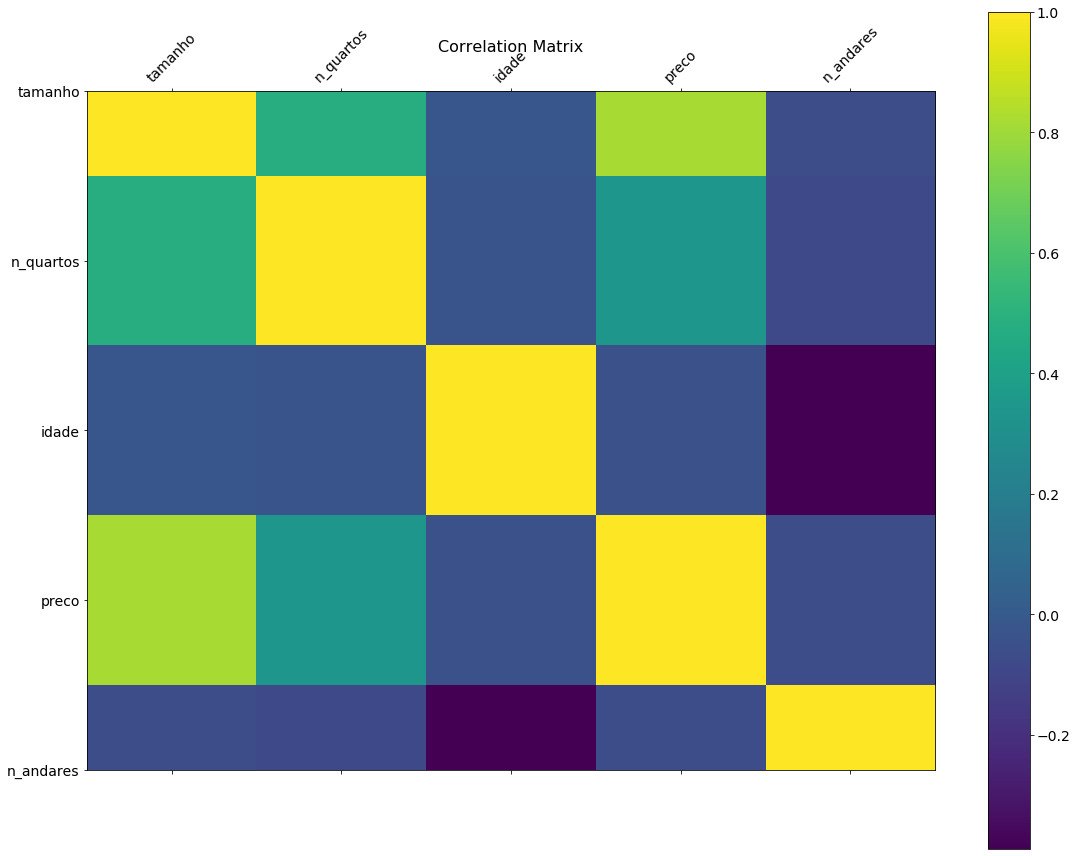

In [8]:
f = plt.figure(figsize=(19, 15))
plt.matshow(raw_df.corr(), fignum=f.number)
plt.xticks(range(raw_df.shape[1]), raw_df.columns, fontsize=14, rotation=45)
plt.yticks(range(raw_df.shape[1]), raw_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

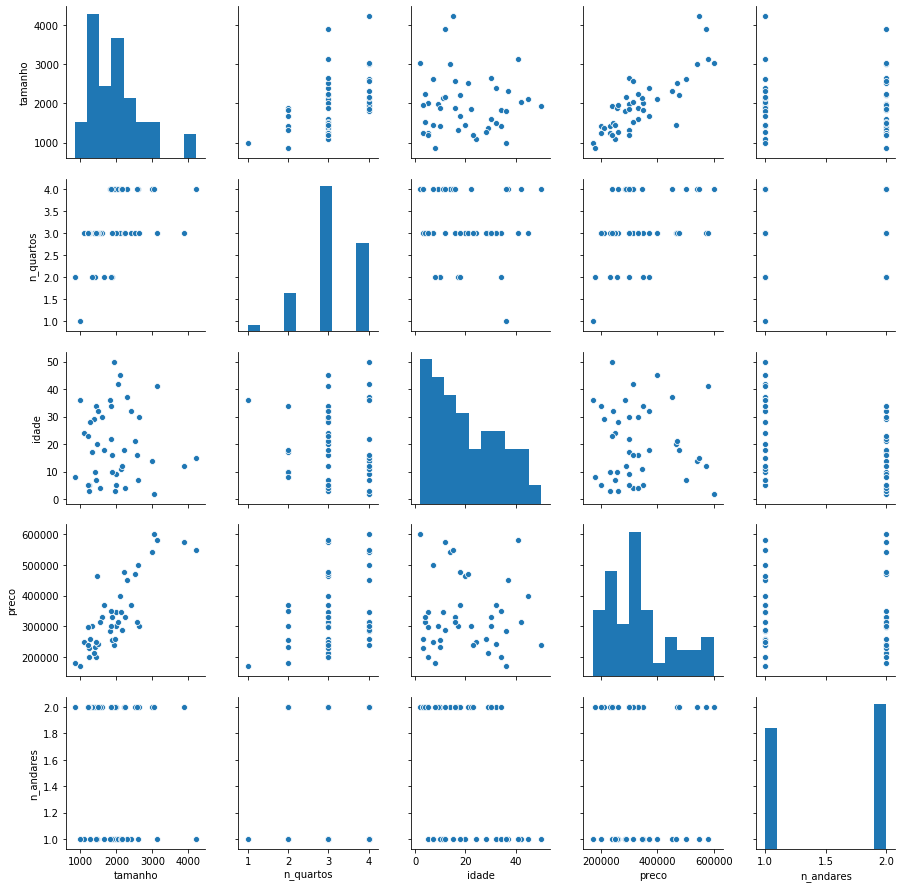

In [11]:
# Via pairplot do seaborn
sns.pairplot(raw_df)

## 5) Separe o dataset em conjuntos de treino e teste, na proporção 70/30

In [12]:
X_train, X_test, y_train, y_test = train_test_split(raw_df.drop(['preco'], axis = 1), raw_df['preco'], test_size=0.30, random_state=42)

## 6) Utilizando a Scikit Learn, ajuste uma regressão linear aos dados e mostre o MSE da etapa de treinamento

In [13]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel()) # flatten arrays

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_teste_treino = pd.DataFrame(lr_model.predict(X_train))

4266094523.2578797

In [17]:
erro_medio = math.sqrt(mean_squared_error(y_train,y_teste_treino))
erro_medio

65315.34676672765

## 7) Prediga o valor da variável meta para cada amostra do conjunto de teste. Qual o MSE? 

In [18]:
y_predicoes = lr_model.predict(X_test)

In [19]:
erro_medio = math.sqrt(mean_squared_error(y_test,y_predicoes))
erro_medio

71200.82931294676

In [20]:
dataframe_com_predicoes = X_test
dataframe_com_predicoes['dados_teste'] = y_test
dataframe_com_predicoes['dados_predicao'] = y_predicoes
dataframe_com_predicoes.head()

,tamanho,n_quartos,idade,n_andares,dados_teste,dados_predicao
43,1664.0,2.0,18.0,1,368500,327076.112491
29,2526.0,3.0,21.0,2,469000,382287.737911
30,2200.0,3.0,18.0,2,475000,343849.419242
42,2162.0,4.0,12.0,1,287000,383847.296639
40,2132.0,4.0,11.0,1,345000,381010.567632
